## **1.- Recopilación de Datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Este conjunto de datos lo enconte en:https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

In [2]:
df = pd.read_csv('../../3.- Datasets/Cirrhosis.csv', index_col=0)

## **2.- Exploración y Análisis de Datos**

In [3]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.shape

(418, 19)

In [5]:
df['Stage'].isnull().sum()

6

In [6]:
df = df.dropna(subset=['Stage'])

El objetivo es predecir el estadio de la cirrosis (Stage), usando un modelo de arbol de desición

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         412 non-null    int64  
 1   Status         412 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            412 non-null    int64  
 4   Sex            412 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          412 non-null    object 
 9   Bilirubin      412 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        412 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      401 non-null    float64
 17  Prothrombin    410 non-null    float64
 18  Stage          

In [8]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,412.000000,412.000000,412.000000,284.000000,412.000000,310.000000,312.000000,312.000000,282.000000,401.000000,410.000000,412.000000
mean,1916.837379,18498.286408,3.227670,369.510563,3.500073,97.648387,1982.655769,122.556346,124.702128,256.102244,10.733415,3.024272
std,1099.941147,3823.705746,4.429421,231.944545,0.423948,85.613920,2140.388824,56.699525,65.148639,95.750598,1.026557,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1094.250000,15609.250000,0.800000,249.500000,3.247500,41.250000,871.500000,80.600000,84.250000,189.000000,10.000000,2.000000
50%,1713.500000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,249.000000,10.600000,3.000000
75%,2610.500000,21200.500000,3.400000,400.000000,3.782500,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


## **3.- División de Datos**

In [9]:
x = df.drop('Stage', axis=1)
y = df['Stage']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.2, random_state=42)

## **4.- Preprocesamiento de datos**

En los arboles de desición no es muy necesario mucho preprocesamiend, de hecho muchas veces es peor, asi que no vamos a normalizarlo, pero si codificarlo y imputarlo

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Identifica las columnas numéricas y categóricas
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# Define los transformadores
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Crea el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crea el pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [13]:
# Aplica el pipeline a tus datos de entrenamiento
x_train_prep = pipeline.fit_transform(x_train)
x_val_prep = pipeline.transform(x_val)
x_test_prep = pipeline.transform(x_test)

In [14]:
x_train = pd.DataFrame(x_train_prep, columns=list(pd.get_dummies(x_train)), index=x_train.index)
x_val = pd.DataFrame(x_val_prep, columns=list(pd.get_dummies(x_val)), index=x_val.index)
x_test = pd.DataFrame(x_test_prep, columns=list(pd.get_dummies(x_val)), index=x_test.index)

In [15]:
x_train.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
ID,,,,,,,,,,,,,,,,,,,,,
349,2855.0,19724.0,1.4,387.229167,3.82,95.376744,1872.107407,122.815509,126.315789,249.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
372,2149.0,13514.0,0.6,387.229167,3.55,95.376744,1872.107407,122.815509,126.315789,248.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
404,1092.0,14610.0,4.6,387.229167,3.60,95.376744,1872.107407,122.815509,126.315789,337.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
303,1250.0,22156.0,1.0,372.000000,3.25,108.000000,1190.000000,140.000000,55.000000,248.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
195,2330.0,10795.0,3.7,347.000000,3.90,76.000000,2544.000000,221.650000,90.000000,129.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [16]:
y_train.isnull().sum()

0

## **5.- Entrenamiento**

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
y_val_pred = tree_model.predict(x_val)
y_test_pred = tree_model.predict(x_test)

## **6.- Evaluación**

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [20]:
# 1. Exactitud (Accuracy)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.4242


In [21]:
# 2. Precisión (Precision)
precision = precision_score(y_val, y_val_pred, average='micro')  # Ajustar 'average'
print(f'Precision: {precision:.4f}')

Precision: 0.4242


In [22]:
# 3. Recuperación (Recall)
recall = recall_score(y_val, y_val_pred, average='micro') 
print(f'Recall: {recall:.4f}')

Recall: 0.4242


In [23]:
# 4. F1-Score
f1 = f1_score(y_val, y_val_pred, average='micro')  
print(f'F1-Score: {f1:.4f}')

F1-Score: 0.4242


In [24]:
# 5. Matriz de Confusión
cm = confusion_matrix(y_val, y_val_pred)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[ 0  4  4  0]
 [ 0  7 10  4]
 [ 2 11 19  7]
 [ 0  3 12 16]]


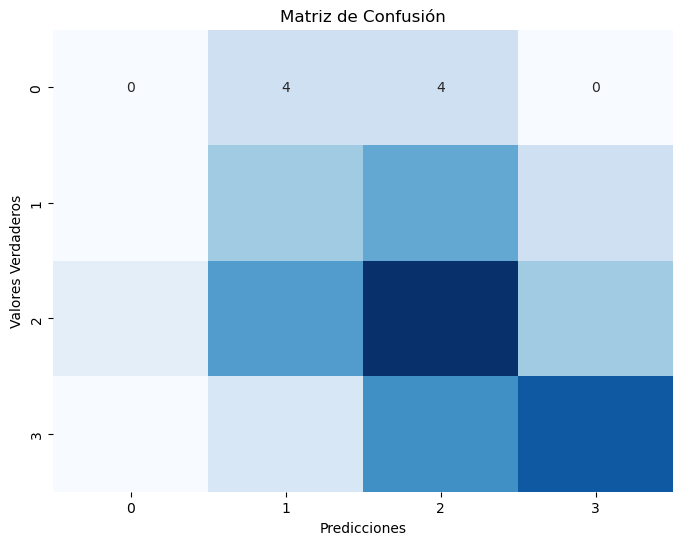

In [25]:
# Plotea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

Ahora con x_test:

In [26]:
# 1. Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.4400


In [27]:
# 2. Precisión (Precision)
precision = precision_score(y_test, y_test_pred, average='micro')  # Ajustar 'average'
print(f'Precision: {precision:.4f}')

Precision: 0.4400


In [28]:
# 3. Recuperación (Recall)
recall = recall_score(y_test, y_test_pred, average='micro') 
print(f'Recall: {recall:.4f}')

Recall: 0.4400


In [29]:
# 4. F1-Score
f1 = f1_score(y_test, y_test_pred, average='micro')  
print(f'F1-Score: {f1:.4f}')

F1-Score: 0.4400


In [30]:
# 5. Matriz de Confusión
cm2 = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[ 0  4  4  0]
 [ 0  7 10  4]
 [ 2 11 19  7]
 [ 0  3 12 16]]


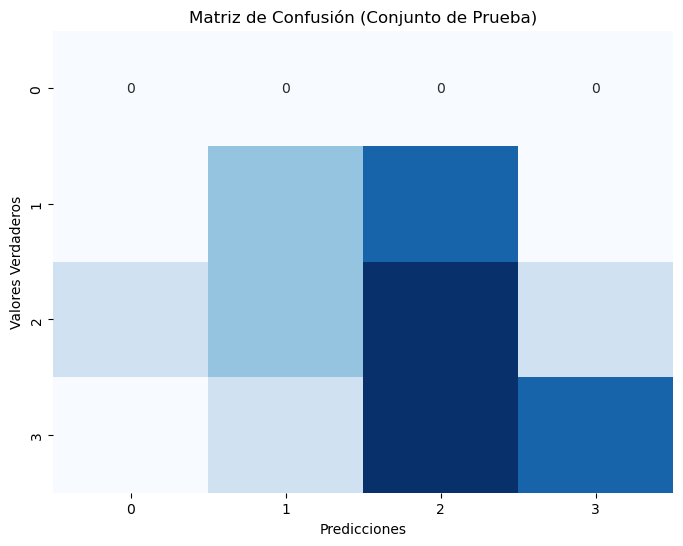

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión (Conjunto de Prueba)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()